In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cereal.csv",sep=";")

In [3]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
6,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
7,Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094
8,Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
9,Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253


In [4]:
df.describe()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
unique,78,8,3,12,7,6,28,14,23,18,37,4,4,8,13,78
top,String,K,C,110,3,1,0,0,13,3,110,25,3,1,1,Float
freq,1,23,74,29,28,30,9,19,8,13,5,63,36,64,30,1


In [5]:
df.shape

(78, 16)

In [6]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

In [7]:
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [8]:
df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

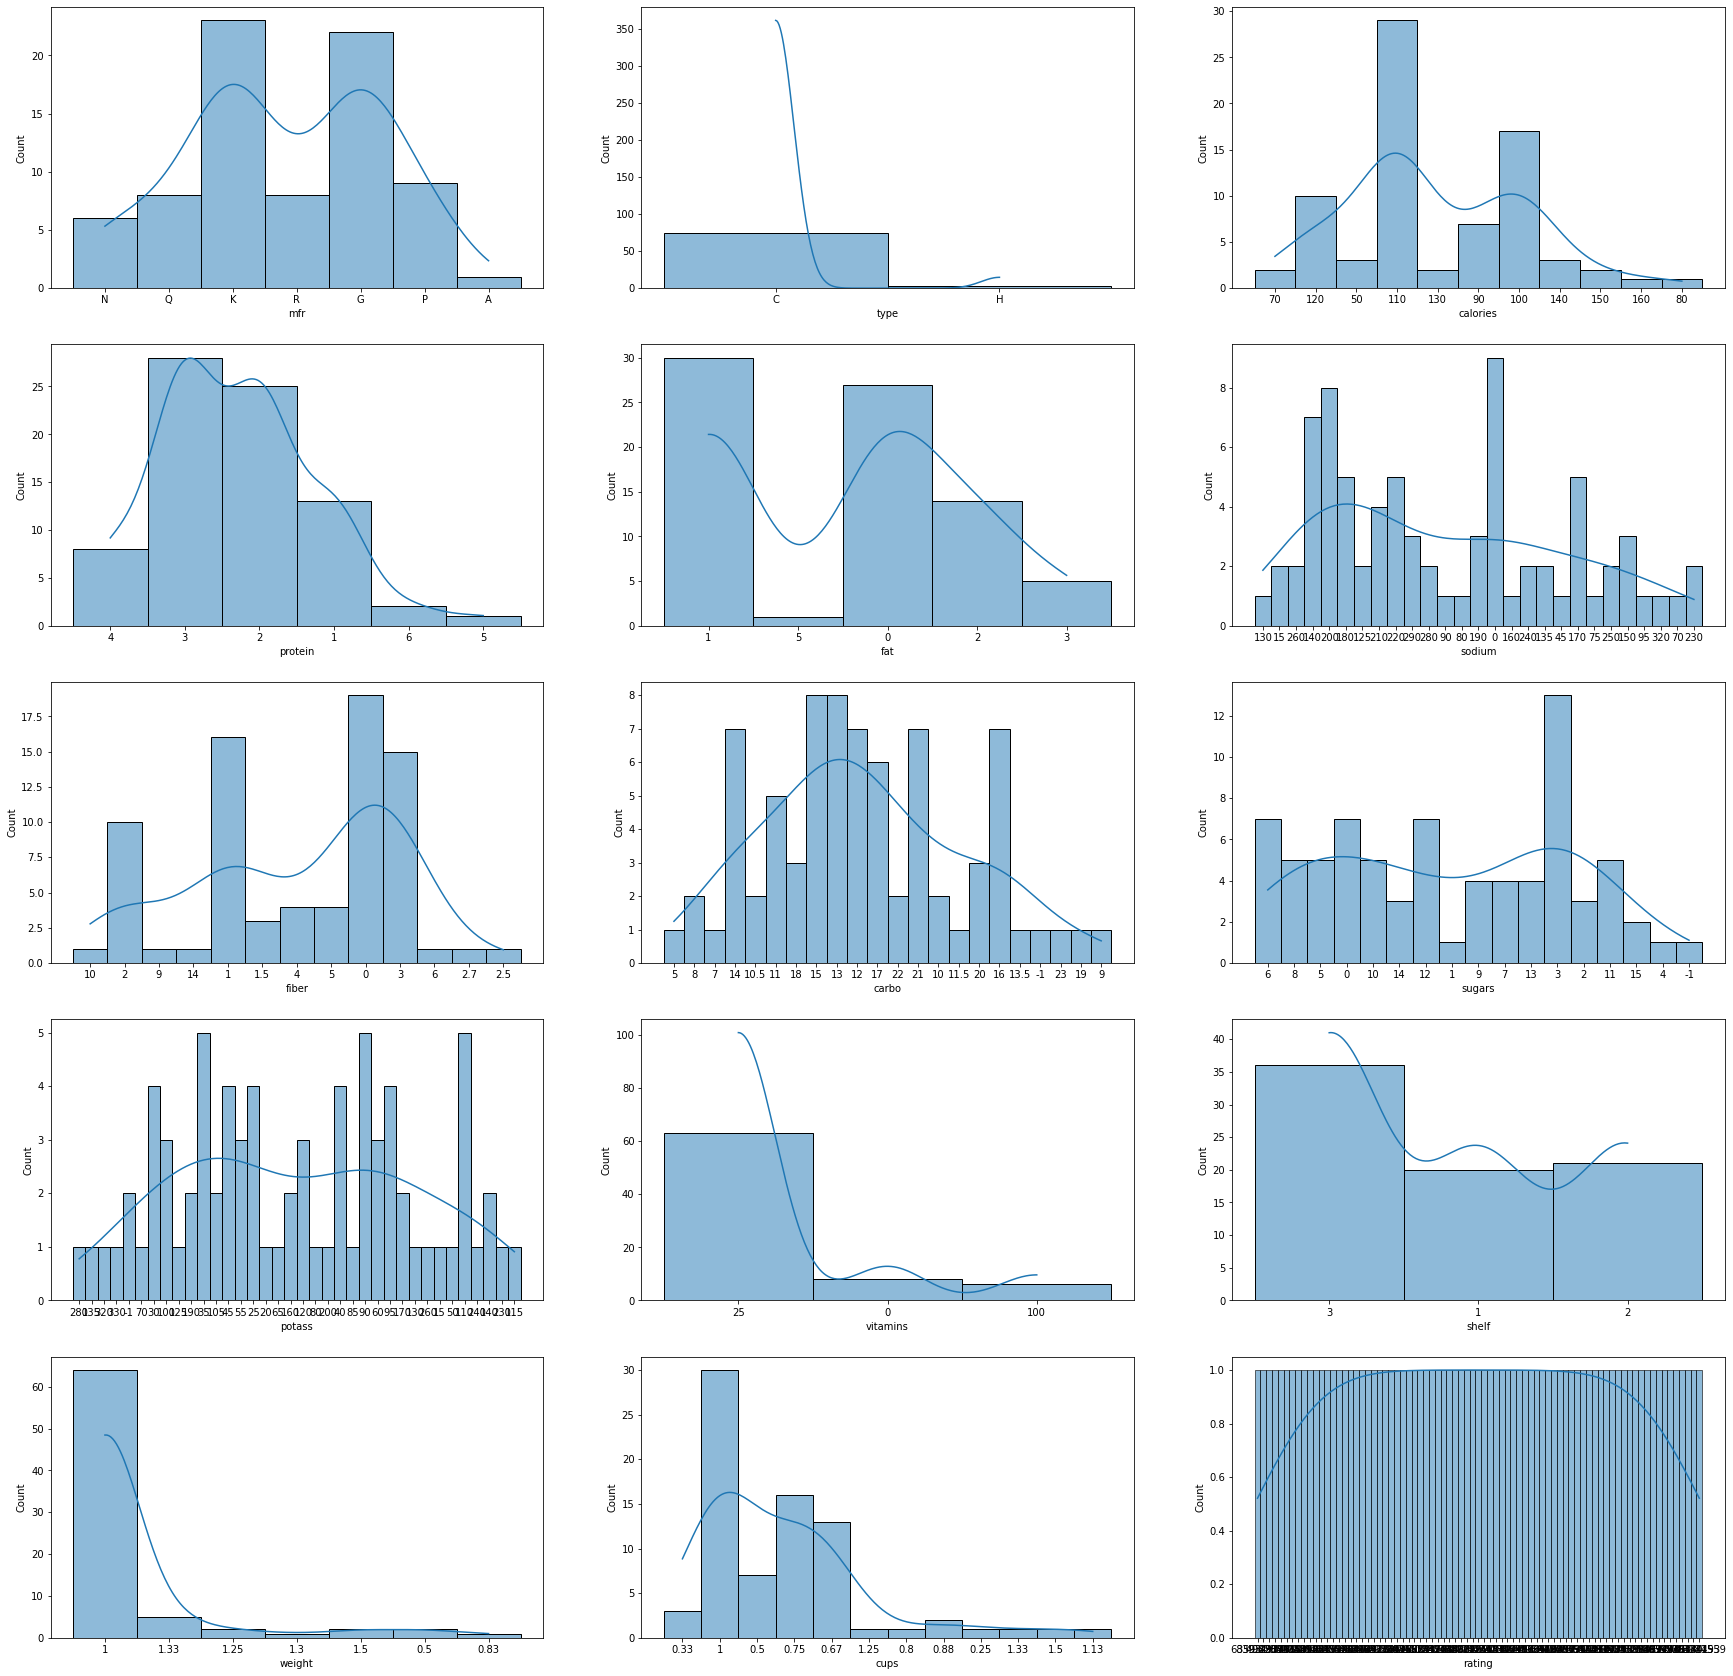

In [10]:
#Visualize the data

plt.figure(figsize=(30,30))
for i in range(15):
    ax = plt.subplot(5,3,i+1)
    sns.histplot(data=df, x=columns[i],kde=True)

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

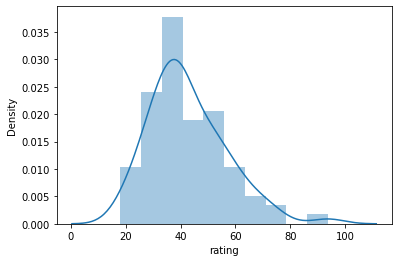

In [11]:
sns.distplot(df["rating"])

In [12]:
df = pd.get_dummies(df, columns=['mfr','type'])

In [13]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70,4,1,130,10,5,6,280,25,3,...,68.402973,0,0,0,1,0,0,0,1,0
2,120,3,5,15,2,8,8,135,0,3,...,33.983679,0,0,0,0,0,1,0,1,0
3,70,4,1,260,9,7,5,320,25,3,...,59.425505,0,0,1,0,0,0,0,1,0
4,50,4,0,140,14,8,0,330,25,3,...,93.704912,0,0,1,0,0,0,0,1,0
5,110,2,2,200,1,14,8,-1,25,3,...,34.384843,0,0,0,0,0,0,1,1,0


In [14]:
X = df.drop(["rating"],axis=1,inplace=False)
y = df[["rating"]]

In [15]:
X.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70,4,1,130,10,5,6,280,25,3,...,0.33,0,0,0,1,0,0,0,1,0
2,120,3,5,15,2,8,8,135,0,3,...,1,0,0,0,0,0,1,0,1,0
3,70,4,1,260,9,7,5,320,25,3,...,0.33,0,0,1,0,0,0,0,1,0
4,50,4,0,140,14,8,0,330,25,3,...,0.5,0,0,1,0,0,0,0,1,0
5,110,2,2,200,1,14,8,-1,25,3,...,0.75,0,0,0,0,0,0,1,1,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups','mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
X_test.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
32,0.545455,0.0,0.2,0.87500,0.000000,0.666667,0.6250,0.138973,0.25,0.5,...,0.400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44,0.454545,0.6,0.2,0.00000,0.000000,0.708333,0.2500,0.290030,0.25,0.5,...,0.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,0.454545,0.4,0.0,0.00000,0.214286,0.625000,0.5000,0.305136,0.25,0.5,...,0.440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.454545,0.4,0.2,0.71875,0.214286,0.750000,0.2500,0.350453,0.25,0.0,...,0.336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59,0.636364,0.4,0.2,0.65625,0.357143,0.625000,0.8125,0.728097,0.25,0.5,...,0.400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.9999999999999993

In [20]:
### User Defined Linear Regression

def estimate_coef_multiple_linear_regression(X_train, y_train):
    
    Theta = np.zeros(X_train.shape[1]).reshape(-1,1)

    a = 0.5
    m = X_train.shape[0]

    for i in range(100000):
        h = np.dot(X_train,Theta)
        J = sum((h-y_train)**2)/(2*X_train.shape[0])
        Theta = Theta - (a/m) * np.dot(X_train.transpose(),(h-y_train))
    
    return Theta

In [21]:
y_train = np.array(y_train.astype("float"))
y_test = np.array(y_test.astype("float"))

Theta = estimate_coef_multiple_linear_regression(X_train, y_train)

In [22]:
y_pred = np.dot(X_test,Theta)

In [23]:
def r_squared(y_test, y_pred):
    return 1 - ((np.sum((y_test-y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2))

In [24]:
## R-Square of model trained using user defined Linear Regression Function & User Defined R-Square Function
r_squared(y_test, y_pred)

0.9344709978177086

In [25]:
## R-Square of model trained using user defined Linear Regression Function & Sklearn R2_score Function

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9344709978177086